# Titanic Project (Practice Project - 4)
**Problem Statement:**

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

- Note: You can find the dataset in the link below.

https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Description of columns in Titanic Dataset

**FEATURES:**
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - gender
- Age - Age
- SibSp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

**Label:**
- survival - Survival (0 = No; 1 = Yes)

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
data.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C
451,452,0,3,"Hagland, Mr. Ingvald Olai Olsen",male,NaN,1,0,65303,19.9667,NaN,S


In [5]:
data.shape

(891, 12)

- This Titanic Dataset contains 891 rows & 12 columns.

In [6]:
data.info() # getting datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Observations:**

- Categorical Data: Sex & Embarked.
- Continuous Data: Age & Fare.
- Discrete Data: SibSp & Parch.
- Alphanumeric Data: Cabin.
- We have 5 features with object datatypes & rest are with numerical features.
- Here our objective is to "Predict Survival" using classification algorithim for that Here our target label is 'Survived'.

# **Data Integrity Check**
- Dataset may contain whitespaces, missing value, duplicates entries, let investigate integrity of data before proceeding for further analysis.

In [7]:
data.duplicated().sum() # Checking for duplicacy.

0

In [8]:
# Checking for the presense of whitespaces, '-', 'null', 'NA':

data.isin([' ','?','-','null','NA']).sum().any()

False

- **Dataset don't contain any duplicate values, whitespaces,' ','?','-','null','NA'.**

In [9]:
# getting NaN Columns data:

miss_val = data.isnull().sum().sort_values(ascending = False)
percent_miss_val =(miss_val/len(data))*100
print(pd.concat([miss_val, percent_miss_val], axis =1, keys =["No. of NaN's", "% NaN data"]))

             No. of NaN's  % NaN data
Cabin                 687   77.104377
Age                   177   19.865320
Embarked                2    0.224467
PassengerId             0    0.000000
Survived                0    0.000000
Pclass                  0    0.000000
Name                    0    0.000000
Sex                     0    0.000000
SibSp                   0    0.000000
Parch                   0    0.000000
Ticket                  0    0.000000
Fare                    0    0.000000


- **We are getting null values in Cabin, Age & Emabrked columns.**
- **We can drop 'Cabin' since 77.10% of its values is missing and therefore it cannot contribute to building a good model for predicting the target variable values.**
- **19.86% of 'Age' data is null value,0.22% of 'Embarked' data is null value, which we can treat and fill without much affecting the dataset.**

In [10]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

- **"Survived"** -  
Target / Label column has 2 categories / classes.
- **"sex"** -  
Feature column has 2 categories / classes.
- **"Pclass"** -   
Feature column has 3 categories / classes.
- **"Embarked"** -  
Feature column has 3 categories / classes.
- **"SibSp"** -  
Feature column has 7 discrete values.
- **"Parch"** -  
Feature column has 7 discrete values.

# **Numerical Value Analysis**

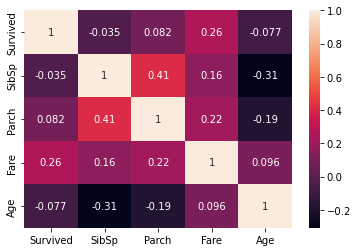

In [11]:
heatmap = sns.heatmap(data[['Survived',"SibSp",'Parch','Fare','Age']].corr(),annot=True)

- Only "Fare" feature seems to establish a significant correlation with respect to "Survived" label, although it doesn't mean that other features are not useful.

# Statistical Analysis:

**Exploring other features with respect to "Survived" label:**

 **1. SibSp (# of siblings or spouses)**

In [12]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

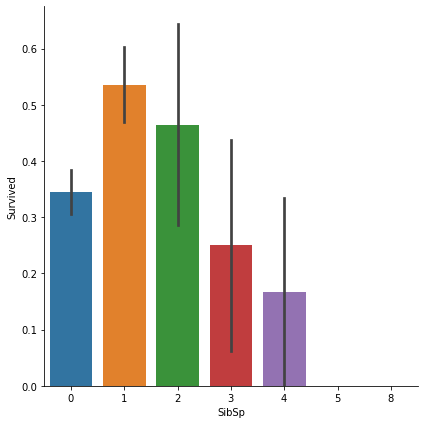

In [13]:
bar_SibSp = sns.factorplot(x = "SibSp", y = 'Survived', data = data, kind = 'bar', size = 6)

- Clearly, the Passengers with more no. of Siblings/Spouses(SibSp >= 3) have less chances of survival.

**2. AGE of Passenger**

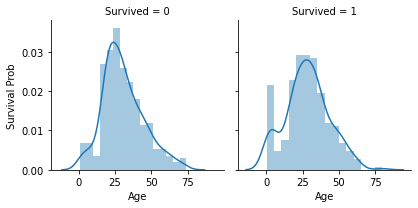

In [14]:
age_visual = sns.FacetGrid(data, col = 'Survived', size = 3)
age_visual = age_visual.map(sns.distplot, "Age")
age_visual = age_visual.set_ylabels("Survival Prob")

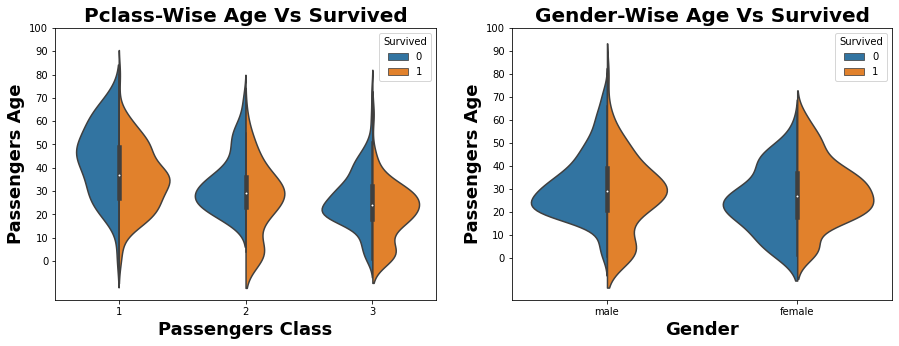

In [15]:
f,ax=plt.subplots(1,2,figsize=(15,5))

sns.violinplot('Pclass','Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass-Wise Age Vs Survived',fontsize= 20, fontweight='bold')
ax[0].set_yticks(range(0,110,10))
ax[0].set_ylabel('Passengers Age',fontsize= 18, fontweight='bold')
ax[0].set_xlabel('Passengers Class', fontsize= 18, fontweight='bold')

sns.violinplot('Sex','Age', hue='Survived',data=data, split= True, ax=ax[1])
ax[1].set_title('Gender-Wise Age Vs Survived',fontsize= 20, fontweight='bold')
ax[1].set_yticks(range(0,110,10))
ax[1].set_ylabel('Passengers Age',fontsize= 18, fontweight='bold')
ax[1].set_xlabel('Gender', fontsize= 18, fontweight='bold')

plt.show()

#### Observation :-
    - The number of children increases with Pclass and the survival rate for passenengers below age 10 looks to be good irrespective of the Pclass.
    - Passengers between 60-80 have less chances of survival.
    - Very young Passenger popopulation have high chances of survival.
    - Survival chances for Passenegers aged 20-50 from Pclass 1 is high and even better for women.
    - For males, the survival chances decreases with increase in age.

**3. Sex v/s Survived**

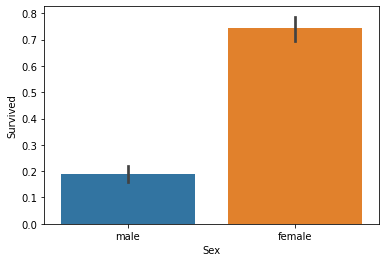

In [16]:
sex_plot = sns.barplot(x='Sex', y='Survived',data = data)

In [17]:
data[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


- The survival rates for a Woman on ship is around 74% while that for Men is around 18.9%.

**4. PClass v/s Survived**

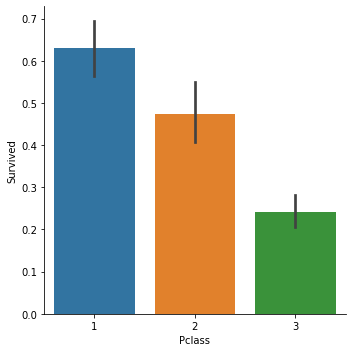

In [18]:
PClass = sns.factorplot(x='Pclass',y='Survived',data=data, kind = 'bar',size=5)

### Pclass v/s Survived by Sex:

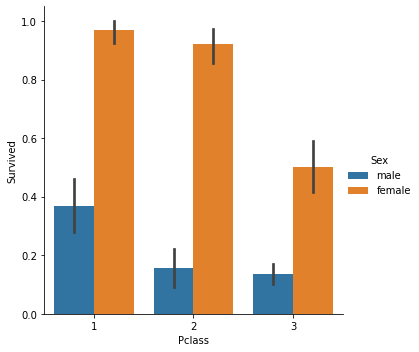

In [19]:
a = sns.factorplot(x='Pclass',y='Survived',hue='Sex', data=data, kind='bar', size=5)

- The overall survial rate of Women in every class is greater than men.
- The order of survival rates with respect to Pclass is: **ClassA(1) > ClassB(2)> ClassC(3)**

**5. Embarked v/s Survived**

In [20]:
data["Embarked"].isna().sum()

2

In [21]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
data["Embarked"] = data["Embarked"].fillna('S')

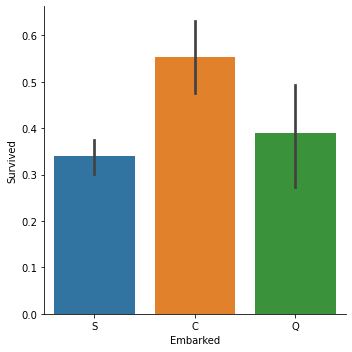

In [23]:
sns.factorplot(x='Embarked',y='Survived', data=data, kind='bar', size=5)

- Passenger's from Cherbourg(i.e. Embarked=C) have high chance of Survival.

### Let's find the reason:

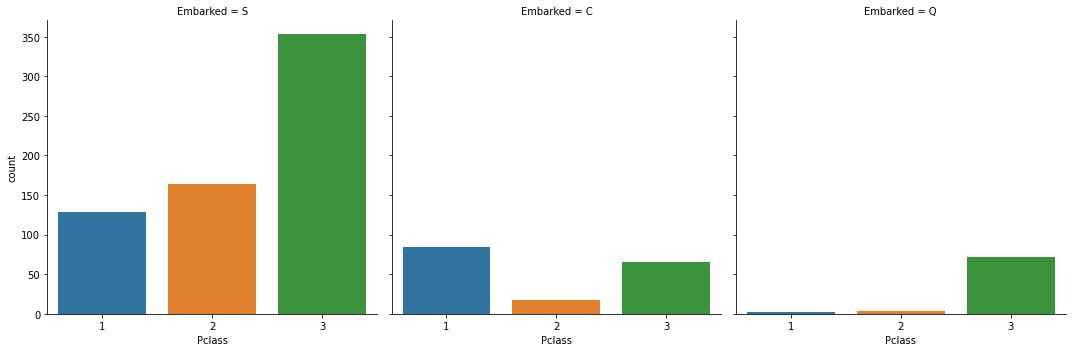

In [24]:
sns.factorplot(x='Pclass',col='Embarked', data=data, kind='count', size=5)

- passengers from Cherbourg(C) mostly took "Class(A)1" which have highest survival rate as seen.

# Handling Missing Values in features:

In [25]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
miss_val = data.isnull().sum().sort_values(ascending = False)
percent_miss_val =(miss_val/len(data))*100
print(pd.concat([miss_val, percent_miss_val], axis =1, keys =["No. of NaN's", "% NaN data"]))

             No. of NaN's  % NaN data
Cabin                 687   77.104377
Age                   177   19.865320
PassengerId             0    0.000000
Survived                0    0.000000
Pclass                  0    0.000000
Name                    0    0.000000
Sex                     0    0.000000
SibSp                   0    0.000000
Parch                   0    0.000000
Ticket                  0    0.000000
Fare                    0    0.000000
Embarked                0    0.000000


- **We are getting null values in Cabin, Age & Emabrked columns.**

In [27]:
# Filling NaN's in Age Column:

mean = data['Age'].mean()
std = data['Age'].std()
nan = data['Age'].isna().sum()

random_age = np.random.randint(mean - std, mean + std, size = nan)       # Filling Nan's method.(use Annova Pred.)
age_slice = data["Age"].copy() # copying age column data to age_slice
age_slice[np.isnan(age_slice)] = random_age # geting index of nan's and filling them.
data["Age"] = age_slice

In [28]:
nan #Checking nan's left in Age Column after filling

177

In [29]:
# Filling NaN's in Age Column:

# As we saw that maximum passengers boarded from Port S, we replace NaN with S.

data['Embarked'] = data['Embarked'].fillna("S") 

In [30]:
data['Embarked'].isna().sum() #Checking nan's left in Embarked Column after filling

0

In [31]:
# Droping unnecessary columns, that don't contribute to our survival prediction:

# Dropping 'Cabin' since 77.10% (as seen earlier) of its values is missing.

drop_col = ["PassengerId",'Name',"Cabin",'Ticket']
data.drop(drop_col,axis = 1, inplace = True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [32]:
# Assigning male=0 & female=1

genders = {"male":0, "female":1}
data["Sex"] = data["Sex"].map(genders)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [33]:
data['Sex'].isna().sum()

0

In [34]:
# Assigning "S":0, "C":1, "Q":2

ports = {"S":0, "C":1, "Q":2}
data["Embarked"] = data["Embarked"].map(ports)

In [35]:
data.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
343,0,2,0,25.0,0,0,13.0000,0
890,0,3,0,32.0,0,0,7.7500,2
411,0,3,0,34.0,0,0,6.8583,2
743,0,3,0,24.0,1,0,16.1000,0
726,1,2,1,30.0,3,0,21.0000,0


In [36]:
# Encoding Categorical Features
# Using Label encoder for transforming Categorical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Categorical_features = ['Sex', 'Embarked']
for i in Categorical_features:
    data[i] = le.fit_transform(data[i])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


### Splitting data

In [37]:
X = data.drop(data.columns[[0]], axis=1)
y = data['Survived'] 

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 150)

In [39]:
# Finding best Random state

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(50,300):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = i)
    log=LogisticRegression()
    log.fit(X_train,y_train)
    y_pred=log.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.874439461883408 on Random_state 150


**Feature Scaling**

In [40]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
x_test = ss.transform(X_test)

# Model Building:

In [41]:
# Importing Machine learning Model library:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [42]:
log = LogisticRegression()
svc = SVC()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 150)

In [43]:
log.fit(X_train, y_train)
svc.fit(X_train, y_train)
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=150)

In [44]:
log_pred = log.predict(X_test)
svc_pred = svc.predict(X_test)
dt_pred = dt.predict(X_test)
knn_pred = knn.predict(X_test)
rf_pred = rf.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.60      0.99      0.75       130
           1       0.86      0.06      0.12        93

    accuracy                           0.61       223
   macro avg       0.73      0.53      0.43       223
weighted avg       0.71      0.61      0.48       223



In [47]:
accuracy_score(y_test, log_pred)

0.6053811659192825

In [48]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74       130
           1       0.00      0.00      0.00        93

    accuracy                           0.58       223
   macro avg       0.29      0.50      0.37       223
weighted avg       0.34      0.58      0.43       223



In [49]:
accuracy_score(y_test, svc_pred)

0.5829596412556054

In [50]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74       130
           1       0.00      0.00      0.00        93

    accuracy                           0.58       223
   macro avg       0.29      0.50      0.37       223
weighted avg       0.34      0.58      0.43       223



In [51]:
accuracy_score(y_test, dt_pred)

0.5829596412556054

In [52]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.82      0.65      0.73       130
           1       0.62      0.80      0.70        93

    accuracy                           0.71       223
   macro avg       0.72      0.72      0.71       223
weighted avg       0.74      0.71      0.71       223



In [53]:
accuracy_score(y_test, knn_pred)

0.7130044843049327

In [54]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.69      0.95      0.80       130
           1       0.86      0.40      0.54        93

    accuracy                           0.72       223
   macro avg       0.77      0.68      0.67       223
weighted avg       0.76      0.72      0.69       223



In [55]:
accuracy_score(y_test, rf_pred)

0.7219730941704036

In [56]:
# Checking to ascertain the best model among above models we used: 

df = pd.DataFrame({'Models':['LR','SVC', 'DT','KNN','RF'],
                    'Accuracy':[accuracy_score(y_test,log_pred)*100,
                               accuracy_score(y_test,svc_pred)*100,
                               accuracy_score(y_test,dt_pred)*100,
                               accuracy_score(y_test,knn_pred)*100,
                               accuracy_score(y_test,rf_pred)*100],
                    'Precicsion':[precision_score(y_test,log_pred)*100,
                                 precision_score(y_test,svc_pred)*100,
                                 precision_score(y_test,dt_pred)*100,
                                 precision_score(y_test,knn_pred)*100,
                                 precision_score(y_test,rf_pred)*100],
                    'f1_Score':[f1_score(y_test,log_pred)*100,
                               f1_score(y_test,svc_pred)*100,
                               f1_score(y_test,dt_pred)*100,
                               f1_score(y_test,knn_pred)*100,
                               f1_score(y_test,rf_pred)*100],
                    'Recall':[recall_score(y_test,log_pred)*100,
                             recall_score(y_test,svc_pred)*100,
                             recall_score(y_test,dt_pred)*100,
                             recall_score(y_test,knn_pred)*100,
                             recall_score(y_test,rf_pred)*100]})
df

,Models,Accuracy,Precicsion,f1_Score,Recall
0,LR,60.538117,85.714286,12.000000,6.451613
1,SVC,58.295964,0.000000,0.000000,0.000000
2,DT,58.295964,0.000000,0.000000,0.000000
3,KNN,71.300448,62.184874,69.811321,79.569892
4,RF,72.197309,86.046512,54.411765,39.784946


# Final Model.

In [57]:
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print('\033[1m'+'Final Random Forest Classifier Model'+'\033[0m')
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(y_test, knn_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(y_test, knn_pred))
print('\n')
print('\033[1m'+'Classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(y_test, knn_pred))

Final Random Forest Classifier Model
Accuracy Score :
 0.7130044843049327


Confusion matrix of Random Forest Classifier : 
 [[85 45]
 [19 74]]


Classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.82      0.65      0.73       130
           1       0.62      0.80      0.70        93

    accuracy                           0.71       223
   macro avg       0.72      0.72      0.71       223
weighted avg       0.74      0.71      0.71       223



# Saving Model:

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 150)
rf.fit(X,y)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=150)

In [59]:
import joblib

In [60]:
joblib.dump(rf,'04_Titanic Project using RF_Class')

['04_Titanic Project using RF_Class']